## What's Cooking?

Picture yourself strolling through your local, open-air market... What do you see? What do you smell? What will you make for dinner tonight?

If you're in Northern California, you'll be walking past the inevitable bushels of leafy greens, spiked with dark purple kale and the bright pinks and yellows of chard. Across the world in South Korea, mounds of bright red kimchi greet you, while the smell of the sea draws your attention to squids squirming nearby. India’s market is perhaps the most colorful, awash in the rich hues and aromas of dozens of spices: turmeric, star anise, poppy seeds, and garam masala as far as the eye can see.

Some of our strongest geographic and cultural associations are tied to a region's local foods. This playground competitions asks you to predict the category of a dish's cuisine given a list of its ingredients. 

Acknowledgements
We want to thank Yummly for providing this unique dataset. Kaggle is hosting this playground competition for fun and practice.

In the dataset, we include the recipe id, the type of cuisine, and the list of ingredients of each recipe (of variable length). The data is stored in JSON format. 

An example of a recipe node in train.json:

 {
 "id": 24717,
 "cuisine": "indian",
 "ingredients": [
     "tumeric",
     "vegetable stock",
     "tomatoes",
     "garam masala",
     "naan",
     "red lentils",
     "red chili peppers",
     "onions",
     "spinach",
     "sweet potatoes"
 ]
 },
In the test file test.json, the format of a recipe is the same as train.json, only the cuisine type is removed, as it is the target variable you are going to predict.

In [40]:
### Importing all the necessary librariers ###

import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
import seaborn as sns

In [41]:
# Plotting functions
def plot_barchar(df, title, xlabel, ylabel):
    plt.figure(figsize=(20,7))

    ax = sns.barplot(x = df[xlabel], y = df[ylabel])
    plt.xticks(rotation = 45, size = 12)
    plt.xlabel(xlabel, size = 14)
    plt.yticks(size = 12)
    plt.ylabel(ylabel, size = 14)

    plt.title(title, size = 20)
    
    
def plot_countplot(df, title, xlabel):
    plt.figure(figsize=(18,7))

    ax = sns.countplot(df[xlabel], color = '#35c4c4')
    plt.xticks(rotation = 45, size = 12)
    plt.xlabel(xlabel, size = 14)
    plt.yticks(size = 12)

    plt.title(title, size = 20)

    
def plot_boxplot(df, title, xlabel, ylabel):
    plt.figure(figsize=(18,7))

    ax = sns.boxplot(x = df[xlabel], y = df[ylabel])
    plt.xticks(rotation = 45, size = 12)
    plt.xlabel(xlabel, size = 14)
    plt.yticks(size = 12)
    plt.ylabel(ylabel, size = 14)

    plt.title(title, size = 20)
    

def plot_all_cuisines(df, cuisines):
    sns.set_palette('husl')
    i = 1
    fig = plt.figure(figsize=(30, 20))
    fig.subplots_adjust(hspace = 0.4, wspace=0.4)

    for cusine in cuisines:
        ingred = df[cusine].to_frame()
        ingred = ingred[ingred[cusine] > 0].sort_values(cusine, ascending = False).head(5).reset_index()

        plt.subplot(4, 5, i)

        ax = sns.barplot(y = ingred['ingredients'], x = ingred[cusine])
        plt.xticks(rotation = 45, size = 12)
        plt.xlabel('recipes')
        plt.yticks(size = 12)
        plt.ylabel('')

        plt.title(cusine, size = 14)
        i += 1

# Prepare and describe the dataset

In [2]:
### Create datasets out of data file for training ###
df_train = pd.read_json("train.json")
df_test = pd.read_json("test.json")

df_train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [3]:
### Desribe training dataset ###

df_train.describe(include='all')

,cuisine,id,ingredients
count,39774,39774.000000,39774
unique,20,NaN,39674
top,italian,NaN,"[cold water, lime, sugar, sweetened condensed ..."
freq,7838,NaN,3
mean,NaN,24849.536959,NaN
std,NaN,14360.035505,NaN
min,NaN,0.000000,NaN
25%,NaN,12398.250000,NaN
50%,NaN,24887.000000,NaN
75%,NaN,37328.500000,NaN


### The dataset contains 39774 instances where each one is a recipe from a cuisine. There is 20 unique cuisines. There are no null values.

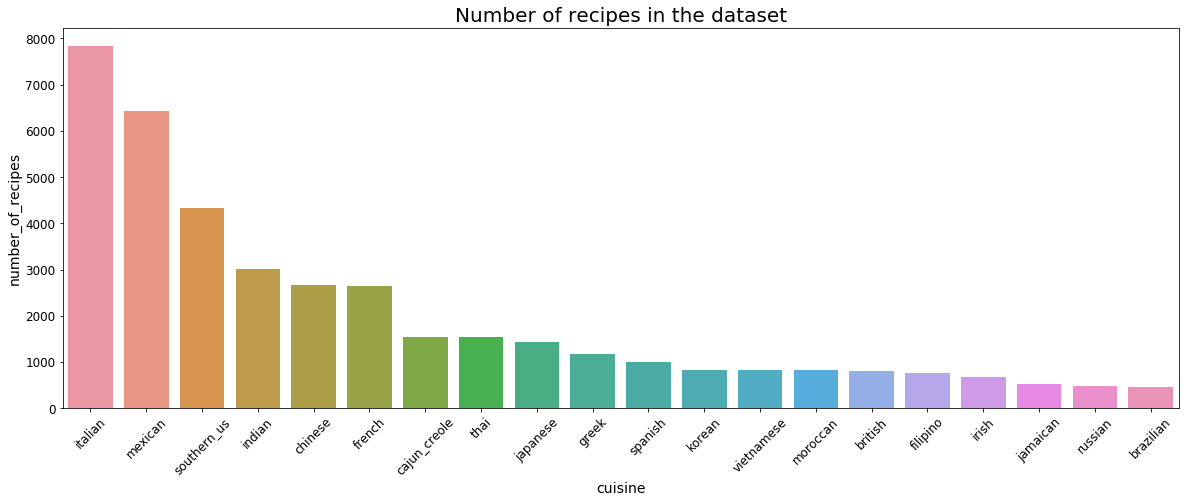

In [42]:
## Describe the training dataset regarding the number of recipes per cuisine ###

df_train_recipes = df_train.groupby(['cuisine'])['id'].count().to_frame().reset_index().rename(columns={'id':'number_of_recipes'}).sort_values('number_of_recipes', ascending = False)
plot_barchar(df_train_recipes, 'Number of recipes in the dataset', 'cuisine', 'number_of_recipes')   

### The most recipes we have from Italian and mecian cuisines. The least we have for jamaican, russian and brazilian. 

# Number of ingredients per recipe

In [15]:
### Calculate the number of ingredients per one recipe ###
number_of_ingred = []
for i in range(len(df_train)):
    ingred = df_train['ingredients'].values[i]
    number_of_ingred.append(len(ingred))
    
df_train['number_of_ingred'] = number_of_ingred
df_train.head()

,cuisine,id,ingredients,number_of_ingred
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",9
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,indian,22213,"[water, vegetable oil, wheat, salt]",4
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",20


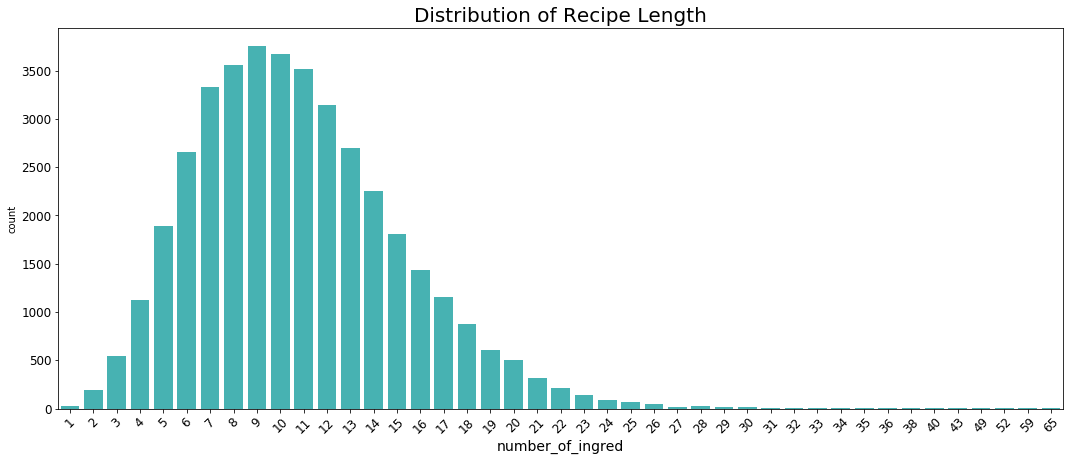

In [11]:
plot_countplot(df_train, 'Distribution of Recipe Length', 'number_of_ingred')

### The most recipes contain around 9 ingredients. The distribution is simillar to the Gaussian one. There are some recipes with one ingredient and some with more than 30 ingredients. 

In [16]:
## Outliers - recipes with one ingredient ## 
df_train[df_train['number_of_ingred'] == 1]

,cuisine,id,ingredients,number_of_ingred
940,japanese,4734,[sushi rice],1
2088,vietnamese,7833,[dried rice noodles],1
6787,indian,36818,[plain low-fat yogurt],1
7011,indian,19772,[unsalted butter],1
8181,japanese,16116,[udon],1
8852,thai,29738,[sticky rice],1
8990,indian,41124,[butter],1
10506,mexican,32631,[corn tortillas],1
13178,thai,29570,[grained],1
17804,southern_us,29849,[lemonade concentrate],1


In [17]:
## Outliers - recipes with more than 40 ingredient ## 
df_train = df_train.sort_values('number_of_ingred', ascending = False)
df_train[df_train['number_of_ingred'] > 40]

,cuisine,id,ingredients,number_of_ingred
15289,italian,3885,"[fettucine, fresh marjoram, minced garlic, oli...",65
30350,brazilian,13430,"[marshmallows, fresh corn, cheddar cheese, shr...",59
26103,mexican,13049,"[vanilla ice cream, lime, garlic powder, zucch...",52
10513,mexican,49282,"[condensed cream of chicken soup, pepper, refr...",49
22906,indian,2253,"[white vinegar, sparkling lemonade, coconut su...",49
31250,italian,29216,"[eggs, warm water, pepper, dried basil, unsalt...",43


In [18]:
### Example of outlier ###
df_train[df_train['number_of_ingred'] == 65]['ingredients'].values

array([list(['fettucine', 'fresh marjoram', 'minced garlic', 'olive oil', 'garlic powder', 'large eggs', 'Alfredo sauce', 'vegetable oil', 'cajun seasoning', 'shredded romano cheese', 'basil dried leaves', 'salt', 'cayenne pepper', 'scallions', 'red bell pepper', 'boneless skinless chicken breast halves', 'soba', 'pasta sauce', 'kosher salt', 'milk', 'fresh ginger', 'ground black pepper', 'flour', 'cooked chicken', 'coarse salt', 'lemon', 'diced tomatoes', 'garlic', 'rice vinegar', 'Neufchâtel', 'garlic cloves', 'dried parsley', 'frozen artichoke hearts', 'penne', 'pepper', 'sweet onion', 'part-skim mozzarella cheese', 'parmigiano reggiano cheese', 'basil leaves', 'onion powder', 'red wine vinegar', 'red pepper flakes', 'orzo', 'crushed red pepper', 'all-purpose flour', 'freshly ground pepper', 'sliced mushrooms', 'panko breadcrumbs', 'plum tomatoes', 'fresh basil', 'fresh leav spinach', 'water', 'sun-dried tomatoes', 'ground pepper', 'grated parmesan cheese', 'boneless skinless chicke

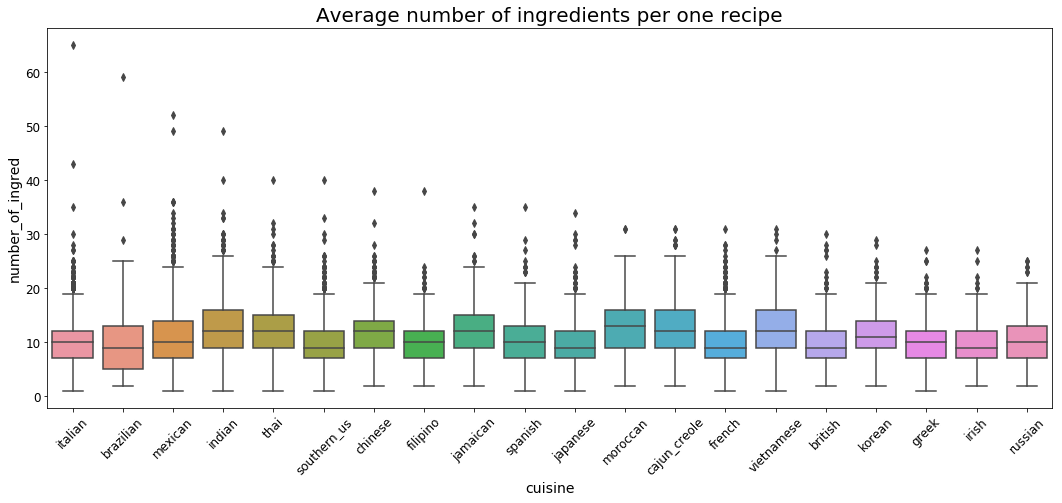

In [19]:
## Average number of ingredients per cuisine ###
df_mean_ingred = df_train.groupby('cuisine')['number_of_ingred'].mean().to_frame().reset_index().sort_values('number_of_ingred',ascending = False)
plot_boxplot(df_train, 'Average number of ingredients per one recipe', 'cuisine', 'number_of_ingred')

### We can see that on average the most ingredients in one recipe have recipes from indian, moroccan and vietnamese. The lest ingredients have recipes from southern us cuisine. Italian and Mexican cuisine have quite a lot of outliers - meaning recipes with more than 90th percentile of ingredients.

# Number of unique ingredients

In [21]:
### Number of unique ingredients per cuisine ###

dictCuisineIngred = {}
cuisines = []
ingredients = []

for i in range(len(df_train)):
    cuisine = df_train['cuisine'][i]
    ingredientsPerCuisine = df_train['ingredients'][i]
    
    if cuisine not in dictCuisineIngred.keys():
        cuisines.append(cuisine)
        dictCuisineIngred[cuisine] = ingredientsPerCuisine
    else: 
        ingredList = dictCuisineIngred[cuisine]
        ingredList.extend(ingredientsPerCuisine)
        ingredList = list(set(ingredList))
        dictCuisineIngred[cuisine] = ingredList

        ingredients.extend(ingredientsPerCuisine)

In [22]:
dictNunberOfIngred = {}

for cuisine in list(dictCuisineIngred.keys()):
    dictNunberOfIngred[cuisine] = len(dictCuisineIngred[cuisine])

df_number_of_inger = pd.DataFrame.from_dict(dictNunberOfIngred, orient='index', columns = ['no of ingred.']).reset_index().rename(columns={'index':'cuisine'})
df_number_of_inger = df_number_of_inger.sort_values('no of ingred.', ascending=False)

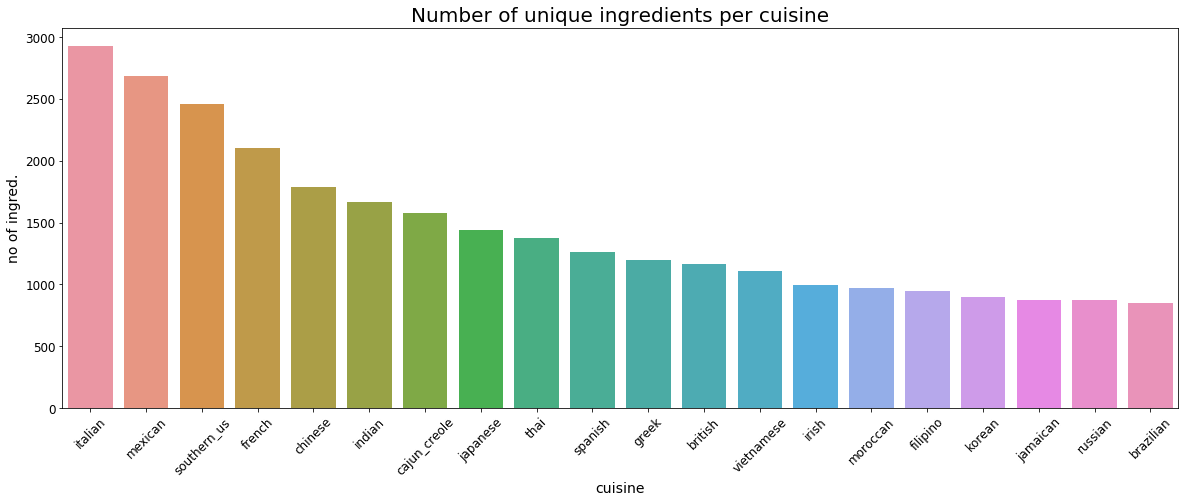

In [23]:
plot_barchar(df_number_of_inger, 'Number of unique ingredients per cuisine','cuisine', 'no of ingred.' )

### Italian, mexican and southern_us cuisine have the most unique ingredients used in recipes. It means that their food is very diversified. On the other hand Jamaican, russian and brazilian cuisine had the least unique ingredients.

# Main ingredients in the dataset

In [24]:
## Main ingredients used in recipes in each cuisine ## 

df_train['ingredients_string'] = [' , '.join(z).strip() for z in df_train['ingredients']] 
df_test['ingredients_string'] = [' , '.join(z).strip() for z in df_test['ingredients']]  

dff_train = df_train.set_index(['cuisine', 'id'])['ingredients'].apply(pd.Series).stack()
dff_train = dff_train.reset_index()
dff_train.columns = ['cuisine','id','ingred_id','ingredients']

dff_train.head()

,cuisine,id,ingred_id,ingredients
0,italian,3885,0,fettucine
1,italian,3885,1,fresh marjoram
2,italian,3885,2,minced garlic
3,italian,3885,3,olive oil
4,italian,3885,4,garlic powder


In [25]:
df_ingredients = dff_train.groupby('ingredients').count()
df_ingredients = df_ingredients['ingred_id'].reset_index().rename(columns = {"ingred_id": "recipes"})
df_ingredients['%_of_all_recipes'] = 100 * df_ingredients['recipes'] / df_ingredients['recipes'].sum()
df_ingredients_top = df_ingredients.sort_values('recipes', ascending = False).head(20)

df_ingredients_top.head()

,ingredients,recipes,%_of_all_recipes
5309,salt,18058,4.214285
4361,onions,7978,1.861865
4343,olive oil,7974,1.860932
6435,water,7462,1.741444
2884,garlic,7384,1.723241


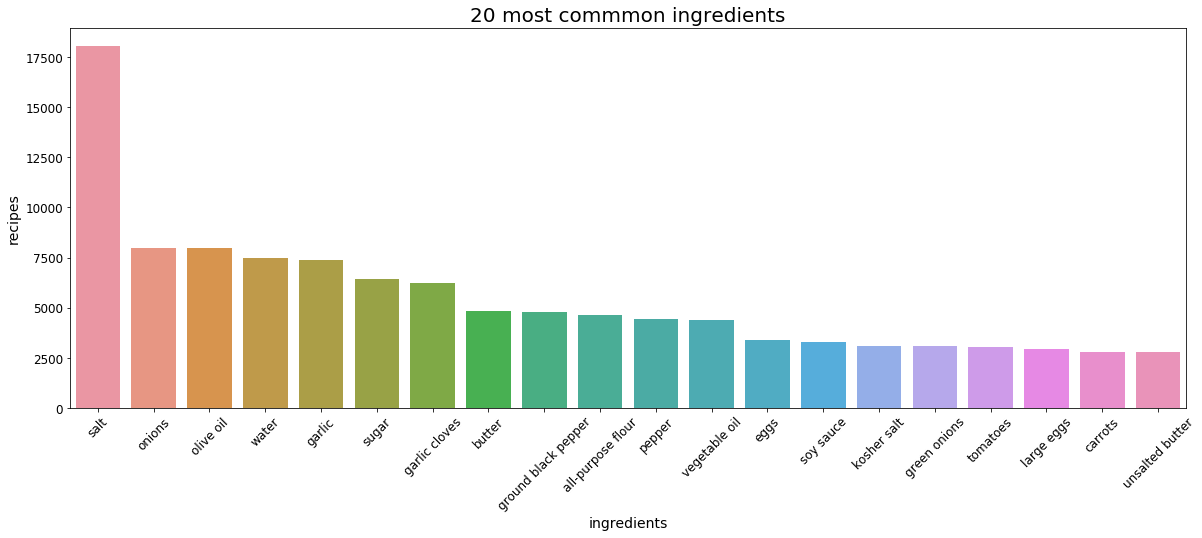

In [26]:
plot_barchar(df_ingredients_top, '20 most commmon ingredients','ingredients', 'recipes' )

### The most common ingredient in all recipes is salt. In many of them we can  find onions, olive oil, water and garlic. Popular is also sugar, butter and pepper.

# Main ingredients in each cuisine

In [27]:
### create dummies variables for ingredients ###
dummies = pd.get_dummies(dff_train['ingredients'])
df_dummies = pd.concat([dff_train, dummies], axis = 1)
df_dummies = df_dummies.drop(columns = ['ingred_id', 'ingredients'], axis=1)
df_dummies = df_dummies.drop_duplicates(keep = 'first', inplace=False)

df_dummies.head()

,cuisine,id,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,italian,3885,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,italian,3885,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,italian,3885,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,italian,3885,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,italian,3885,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
### sum ingredients from each recipes ###

df_top_grouped = df_dummies.groupby(['cuisine','id']).sum().reset_index()
df_top_grouped.head()

,cuisine,id,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,brazilian,203,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brazilian,415,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brazilian,550,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brazilian,605,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brazilian,623,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
### sum ingredients from each cuisine ###

df_top_grouped_cuisine = df_top_grouped.groupby(['cuisine']).sum().drop(['id'], axis=1)
df_top_grouped_cuisine.head()

,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
cuisine,,,,,,,,,,,,,,,,,,,,,
brazilian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
british,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
cajun_creole,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0
chinese,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,30.0,0.0
filipino,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0


In [31]:
### prepare dataset with the most popular ingredients per cuisine ###
cuisines = []

for c in df_top_grouped_cuisine.index:
    cuisines.append(c)

ingredients_in_cuisine = df_ingredients.set_index('ingredients').drop(['recipes', '%_of_all_recipes'], axis=1)

for cusine in cuisines:
    df_cuisine = df_top_grouped_cuisine.loc[cusine].to_frame()
    ingredients_in_cuisine = pd.concat([ingredients_in_cuisine, df_cuisine], axis=1, sort=False)
    
ingredients_in_cuisine['#_of_cuisines'] = ingredients_in_cuisine.apply(lambda x: x.astype(bool).sum(), axis = 'columns')
unique_ingredients = ingredients_in_cuisine[ingredients_in_cuisine['#_of_cuisines'] == 1]

unique_ingredients.head()

,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,...,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese,#_of_cuisines
ingredients,,,,,,,,,,,,,,,,,,,,,
(10 oz.) frozen chopped spinach,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
(15 oz.) refried beans,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1
"2 1/2 to 3 lb. chicken, cut into serving pieces",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2% low fat cheddar chees,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2% lowfat greek yogurt,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


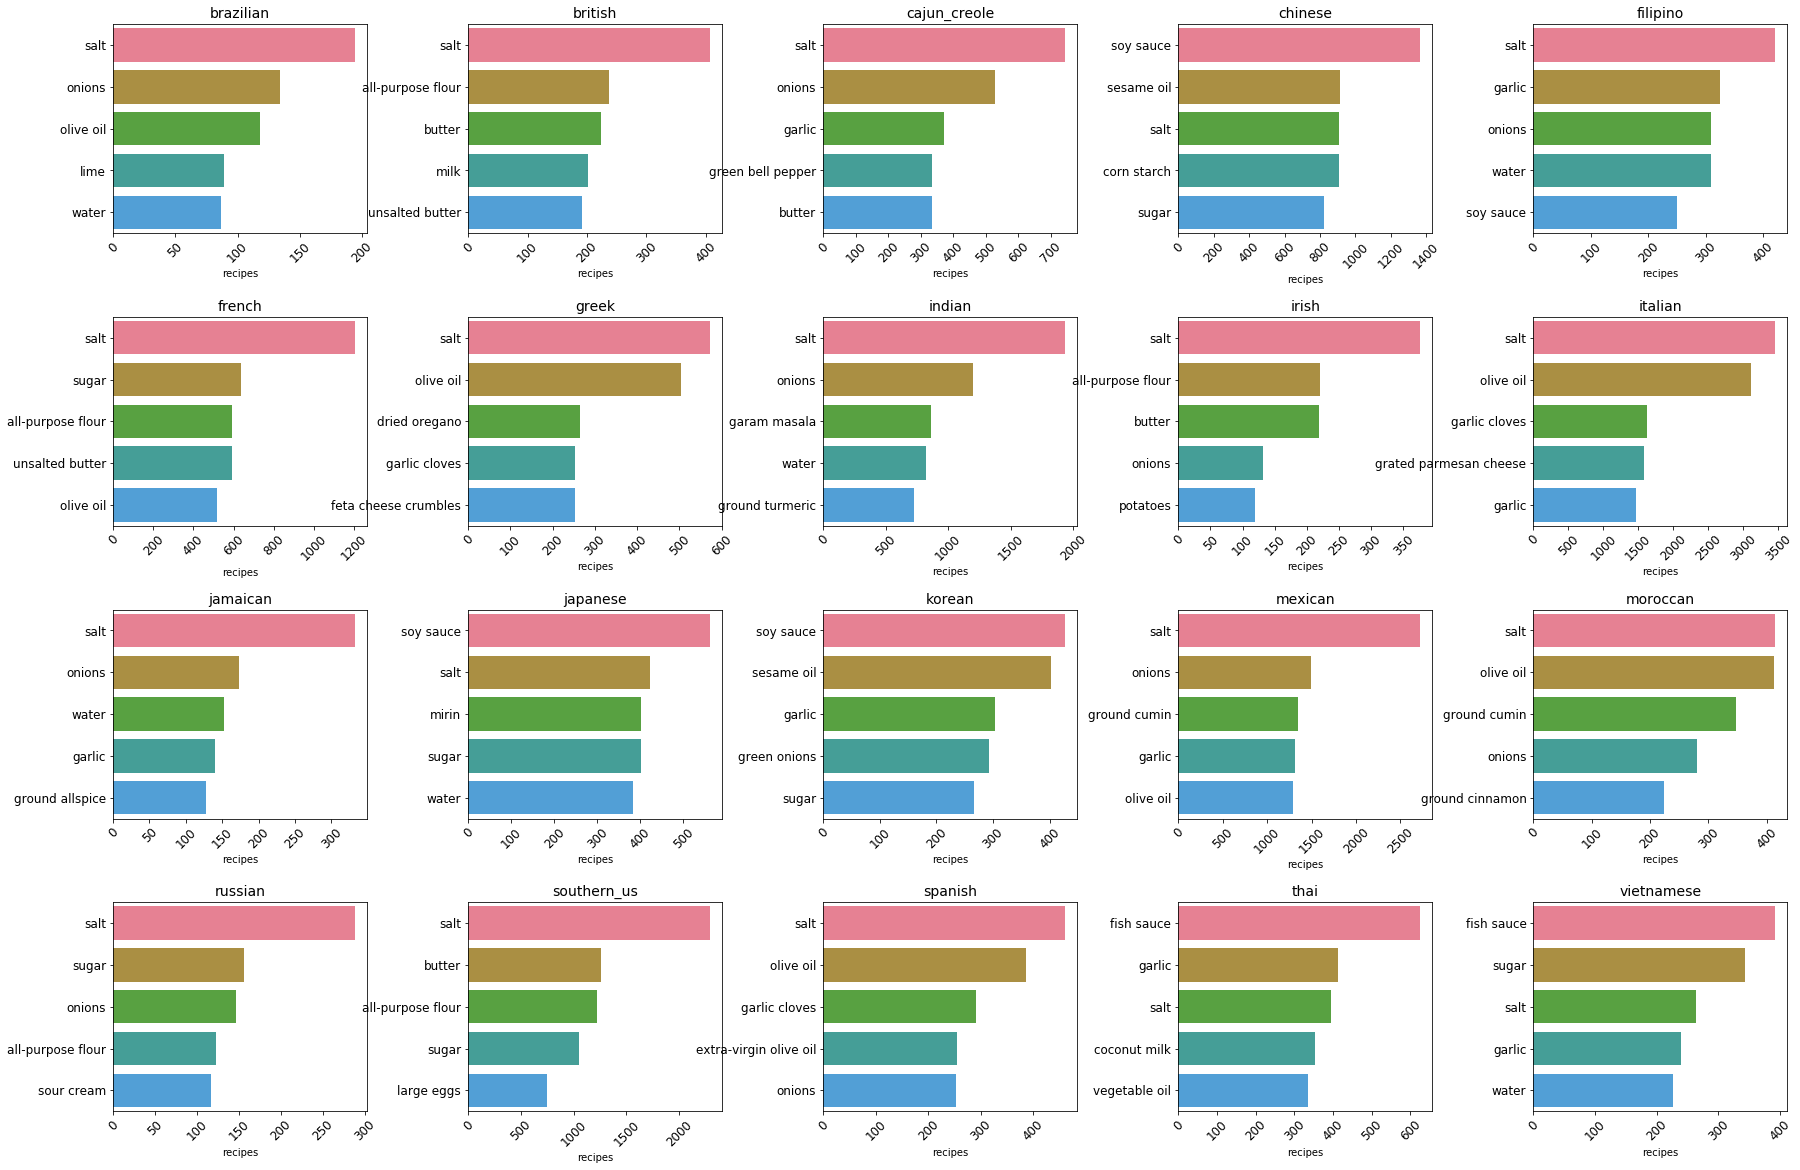

In [38]:
### Plot the most popular ingredients in each cuisine ###
plot_all_cuisines(ingredients_in_cuisine, cuisines)

### We can see that in the most cuisines salt is the most popular ingredients. What stands out are Asian cuisine where the most popular are soy sauce, sesame oil and fish sauce. We can observe the similarities between cuisines from iberian part - italian, frensh, spanish abd greek. Also british and irish cuisines look qite similar.

# Unique ingredients in each cuisine

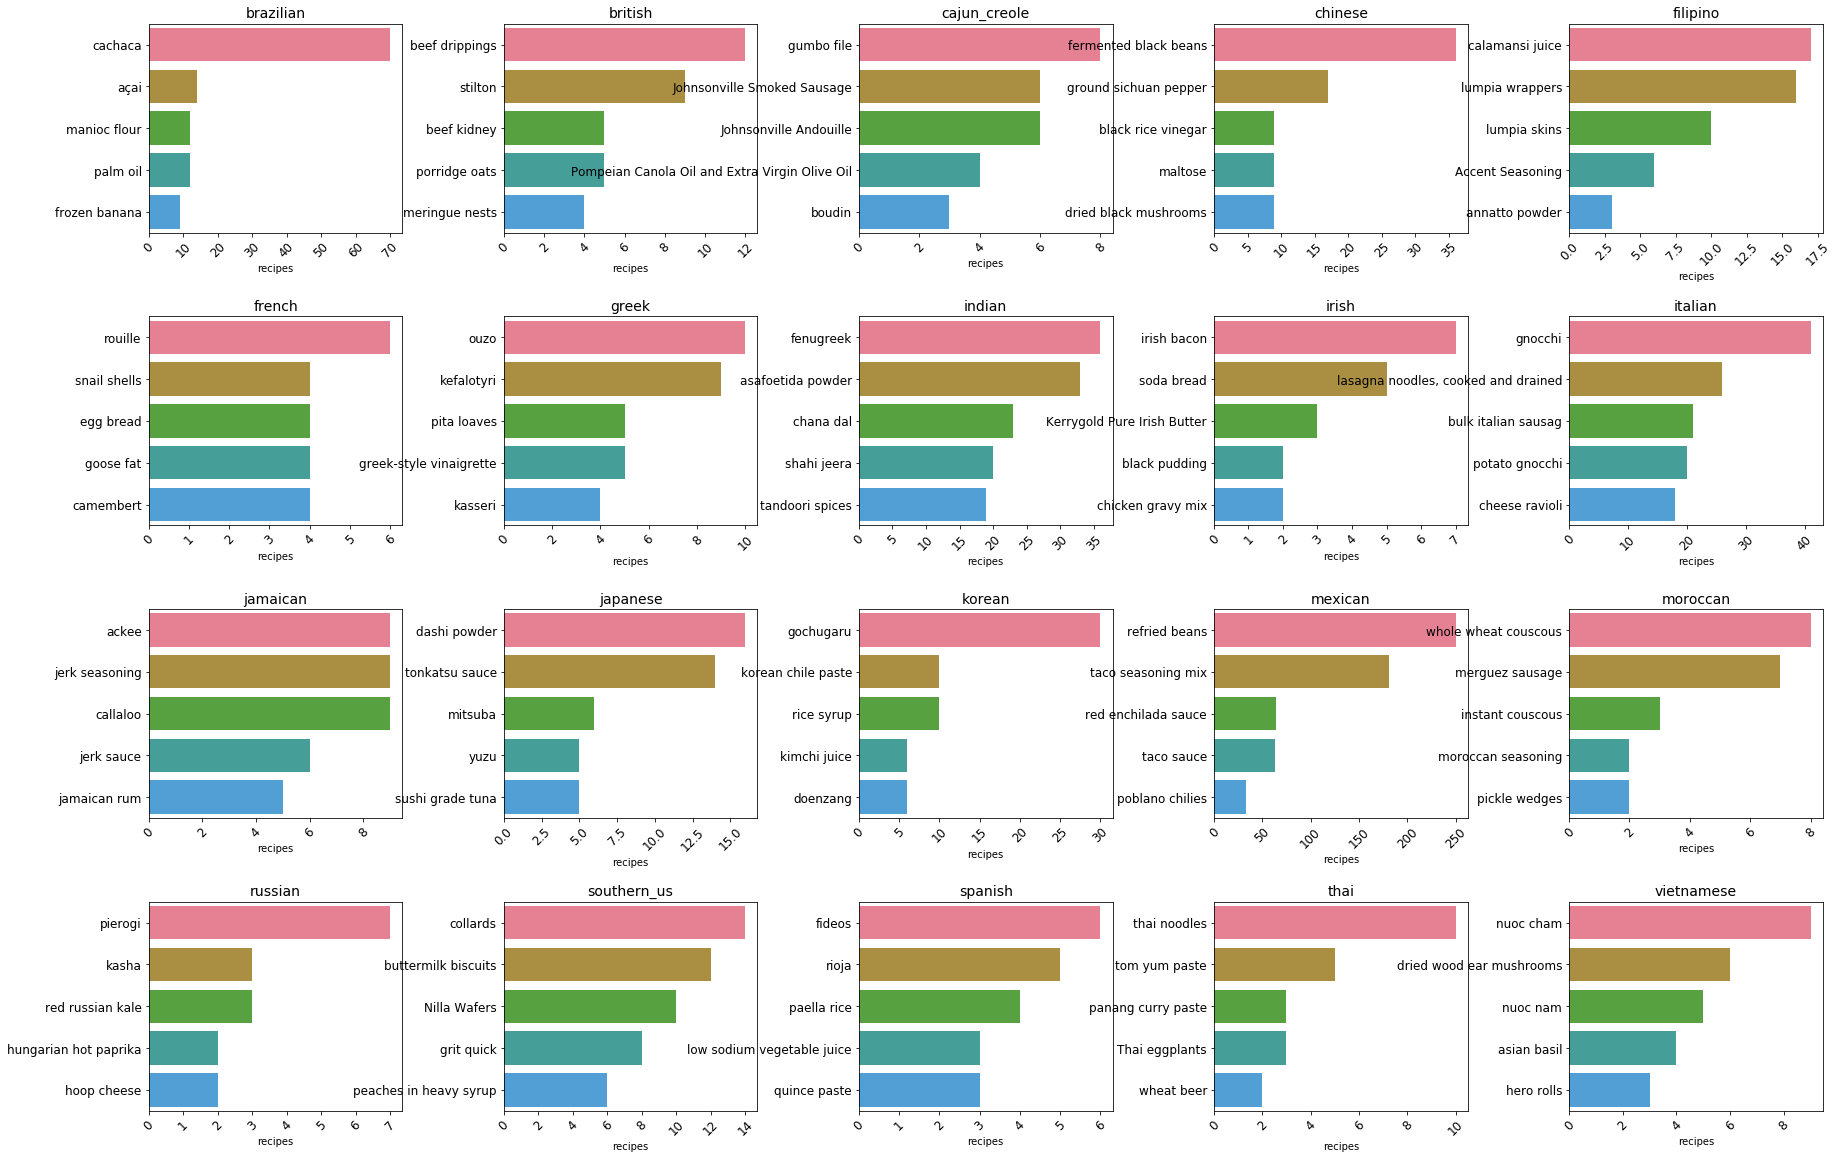

In [39]:
### Plot the unique ingredients in each cuisine ###
plot_all_cuisines(unique_ingredients, cuisines)

### Graph above shows the ingredients qhich immeadiately indicate the cuisine. So for example if you have pierogi it will be the russian cuisine for sure!

# Analysis 

In [31]:
### Importing necessary liabraries ###
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [32]:
#### Vectorize the data ###
vect = TfidfVectorizer(binary=True).fit(df_train['ingredients_string'].values)

X_train_vectorized = vect.transform(df_train['ingredients_string'].values)
X_train_vectorized = X_train_vectorized.astype('float')

test_transformed = vect.transform(df_test['ingredients_string'].values)
test_transformed = test_transformed.astype('float')

In [33]:
### EPrepare encoder ###
encoder = LabelEncoder()
y_transformed = encoder.fit_transform(df_train.cuisine)

In [34]:
### Divide the data set  for training and testing ###
X_train, X_test, y_train, y_test = train_test_split(X_train_vectorized, y_transformed , random_state = 0)

In [35]:
### Create the model ###
model = SVC(
    C=10,
    kernel='rbf',
    gamma=1.2,
    coef0=1,
    cache_size=200,
)
classifier = OneVsRestClassifier(model, n_jobs=-1)
classifier.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=10, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma=1.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=-1)

In [36]:
### Predict based on the chosen model ###
y_pred = encoder.inverse_transform(classifier.predict(X_train))
y_true = encoder.inverse_transform(y_train)

In [37]:
print(f'Accuracy score on train data: {accuracy_score(y_true, y_pred)}')

Accuracy score on train data: 0.9995306738183037


In [84]:
### Example ###
print(df_train['ingredients_string'][99])

balsamic vinegar , low salt chicken broth , dijon mustard , corn starch , dried basil , garlic cloves , white wine vinegar


In [85]:
y_true[99]

'korean'